## Visualization Script

This script is used to generate the trends chart of research for specific keywords provided by the user.

### 1.0 <u>Code:</u>

Here, we import the ```matplotlib.pyplot``` library in order to plot the frequency charts.

In [1]:
import matplotlib.pyplot as plt
import csv
from collections import Counter

Importing the files here to be read and generate the visualizations for the trends.

### 1.1 <u>Variables</u>

In [2]:
path_to_dictionary = "/home/sarthak/projects/Bias/LOGS/LOG_2019-02-27_15_23_Eastern_Himalayas/Abstract_Database_2019-02-27_15_23_DICTIONARY.csv"
trend_keywords = "Conservation"

### 1.2 <u>Functioning:</u>

What's happening here?
1. Trends function receives the dictionary prepared by the ```Scraper.py``` code.

2. Information is organized in a conventional key and value form; ```key=year```, ```value=frequency```.

3. We extract the key from the dictionary and generate a new list comprising of the years in which the trends keywords occurs. 

4. We calculate the ```max``` and ```min``` years in this new list and convert them to int and extract the complete set of years that lie between these extremes.

5. We cycle through the keys in the dictionary and extract frequency of occurrence for each year in the list of years.

6. If the term does not appear in that year, then it's assigned zero (that's how dictionaries work).

7. The two lists (list of years and list of frequencies) are submitted to the plot function for plotting.

This list holds the years as per the frequency made available in the ```.csv``` file and in turn is used to generate the ```abstract_word_dictionary``` for plotting

In [3]:
year_holder = []

This function is used to extract the ```.csv``` data generated from the ```Scraper.py``` code run. This data is then used for plotting the research trends chart using the ```trends_histogram()``` function.

In [4]:
def csv_to_dictionary(path_to_dictionary):
    with open(path_to_dictionary) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter = ',')
        for row in csv_reader:
            for element in range (0, int(row[1])):
                year_holder.append(int(row[0]))
    abstract_word_dictionary = Counter(year_holder)
    starting_year = min(year_holder)
    ending_year = max(year_holder)
    return abstract_word_dictionary, starting_year, ending_year

Here, we extract the starting year and the ending year from the year_holder list that we have generated previously. These two variabes are then utilized by the trends histogram function.

In [6]:
def trends_histogram(abstract_word_dictionary, starting_year, ending_year, trend_keywords):
	#This function is responsible for generating the histograms to visualizations the trends in research topics.'''

	'''This list will hold the abstract years which contain occurrences of the word that we are investigating'''
	list_of_years=[]
	for element in abstract_word_dictionary:
		list_of_years.append(element)
	list_of_years_to_be_plotted = [year for year in range(int(starting_year), int(ending_year)+1)]
	'''Here we generate the corresponding frequencies'''
	frequencies_to_be_plotted = [int(abstract_word_dictionary[(year)]) for year in range(int(starting_year), int(ending_year)+1)]
	'''Here, we will generate a list of frequencies to be plotted along the Y axis, using the Y ticks function'''
	y_ticks_frequency = []
	'''Extracting the largest frequency value in the list to generate the Y ticks list'''
	max_frequency_value = max(frequencies_to_be_plotted)
	for frequency_element in range(0, max_frequency_value+1):
		y_ticks_frequency.append(frequency_element)

	'''Varying the size of the figure to accommodate the entire trends graph generated'''
	plt.figure(figsize=[15,10])
	'''Plotting the years along the X axis and the frequency along the Y axis'''
	plt.plot(list_of_years_to_be_plotted, frequencies_to_be_plotted)
	'''Plotting the frequencies again to make the frequency pivots visible'''
	plt.plot(list_of_years_to_be_plotted, frequencies_to_be_plotted, 'ro')
	'''Here, we are labeling each of the frequencies plotted to ensure better readability, instead of second-guessing Y axis values'''
	for element in range(0, len(list_of_years_to_be_plotted)):
		'''Avoiding the unnecessary clutter in the visualization by removing text boxes for frequency=0'''
		if(frequencies_to_be_plotted[element]!=0):
			plt.text(list_of_years_to_be_plotted[element], frequencies_to_be_plotted[element], "Frequency: "+str(frequencies_to_be_plotted[element]), bbox=dict(facecolor='orange', alpha=0.3), horizontalalignment='right', verticalalignment='top',size=8)

	'''Adds a label to the element being represented across the Y-axis (frequency of occurrence)'''
	plt.ylabel("Frequency of occurrence:"+" "+trend_keywords)
	'''Adds a label to the element being represented across the X-axis (years)'''
	plt.xlabel("Year of occurrence:"+" "+trend_keywords)
	'''Adds an overall title to the trends chart'''
	plt.title("Trends Chart:"+" "+trend_keywords)
	'''xticks() ensures that each and every year is plotted along the x axis and changing the rotation to ensure better readability'''
	plt.xticks(list_of_years_to_be_plotted, rotation=45)
	'''Saves the graph generated to the disc for further analysis'''
	plt.savefig("Data_Visualization_Trends_Graph"+"_"+trend_keywords+".png")

def visualizer_main(trend_keywords):
	'''Trends visualizer is called to generate the trends histograms'''

	abstract_word_dictionary, starting_year, ending_year = csv_to_dictionary(path_to_dictionary)
	trends_histogram(abstract_word_dictionary, starting_year, ending_year, trend_keywords)
  

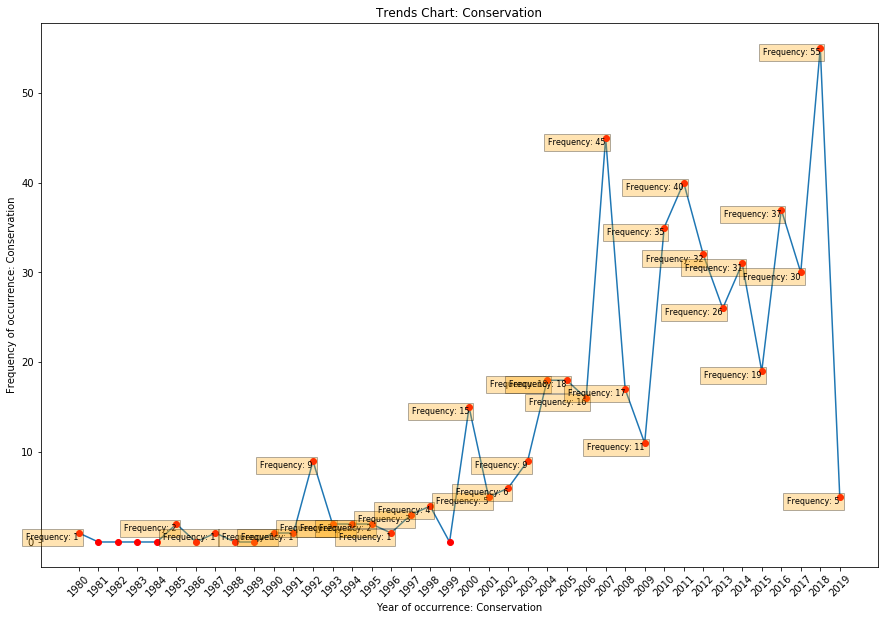

In [7]:
visualizer_main(trend_keywords)